# Results generation

Once the functioning of the Ising Model was clear (by implementing it on the file `Ising.ipynb`) we made this file where the model is abstracted as a _class_ where we can easily interact with the model by its methods and properties.

## Libraries used

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

## Model implementation with OOP paradigm

In [2]:
class Ising:
    def __init__(self, width, height, prob=(0.5,0.5)):
        self.height = height
        self.width = width
        self.init_lattice(prob)
        
    def init_lattice(self, prob=(0.5,0.5)):
        self.lattice = np.random.choice([1, -1], size=(self.height, self.width), p=prob)
        self.measure_energy()
        self.measure_magnet()
        
    def measure_energy(self):
        k = np.array([[0, 1, 0],
                      [1, 0, 1],
                      [0, 1, 0]])
        self.energy = -(self.lattice * convolve(self.lattice, k, mode="wrap")).sum()
        
    def measure_magnet(self):
        self.magnet = self.lattice.sum()
        
    def update_lattice(self, temp):
        x = np.random.randint(0, self.width)
        y = np.random.randint(0, self.height)
        s = self.lattice[y,x]
        e0 = -s*(self.lattice[y-1,x] \
                + self.lattice[(y+1)%self.height,x] \
                + self.lattice[y,x-1] \
                + self.lattice[y,(x+1)%self.width])
        if e0 > 0:
            self.lattice[y,x] = -s
            self.energy += -2*e0
            self.magnet += -2*s
        elif np.random.rand() < np.exp(2*e0/temp):
            self.lattice[y,x] = -s
            self.energy += -2*e0
            self.magnet += -2*s
            
    def montecarlo(self, times, temp):
        t = 0
        while t < times:
            self.update_lattice(temp)
            t += 1
    
    def summary(self):
        print(f"--- SUMMARY ---\nm = {self.magnet}\nE = {self.energy}")

## Results generation

At first we will instantiate our model making a $200\times200$ lattice

In [3]:
sim1 = Ising(20, 20)

### Plotting states

#### Initial state

We can see a plot of the initial state

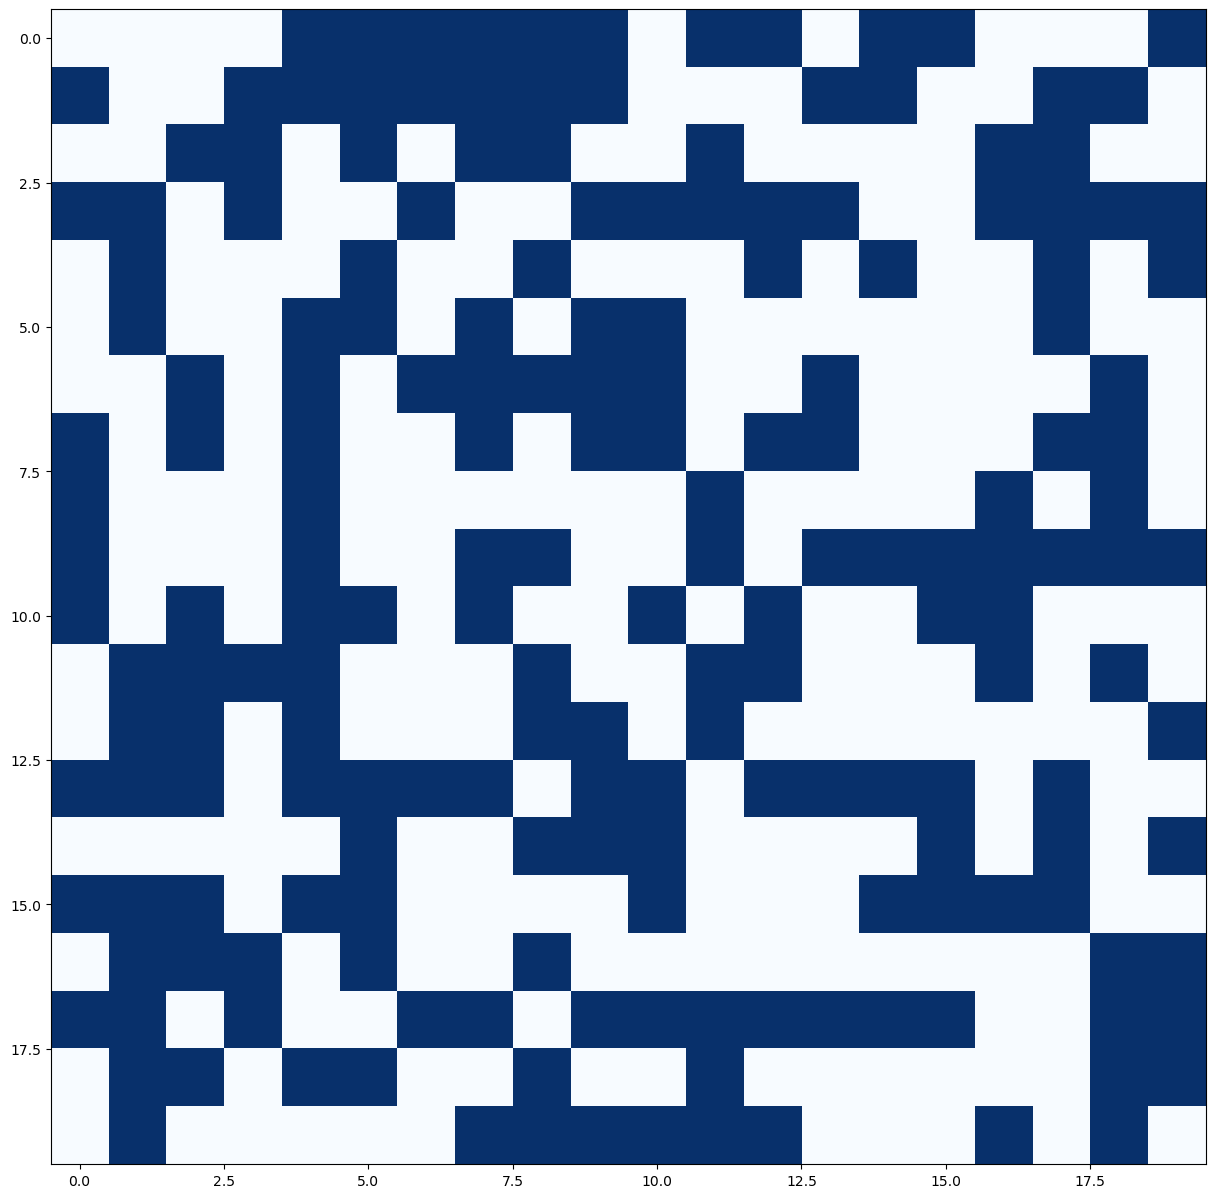

In [4]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(sim1.lattice, cmap='Blues')

with energy and magnetization

In [5]:
sim1.summary()

--- SUMMARY ---
m = -24
E = -24


#### Updating the system

In [6]:
sim1.montecarlo(100_000, 1.5)

#### Final state

We can see a plot of the final state

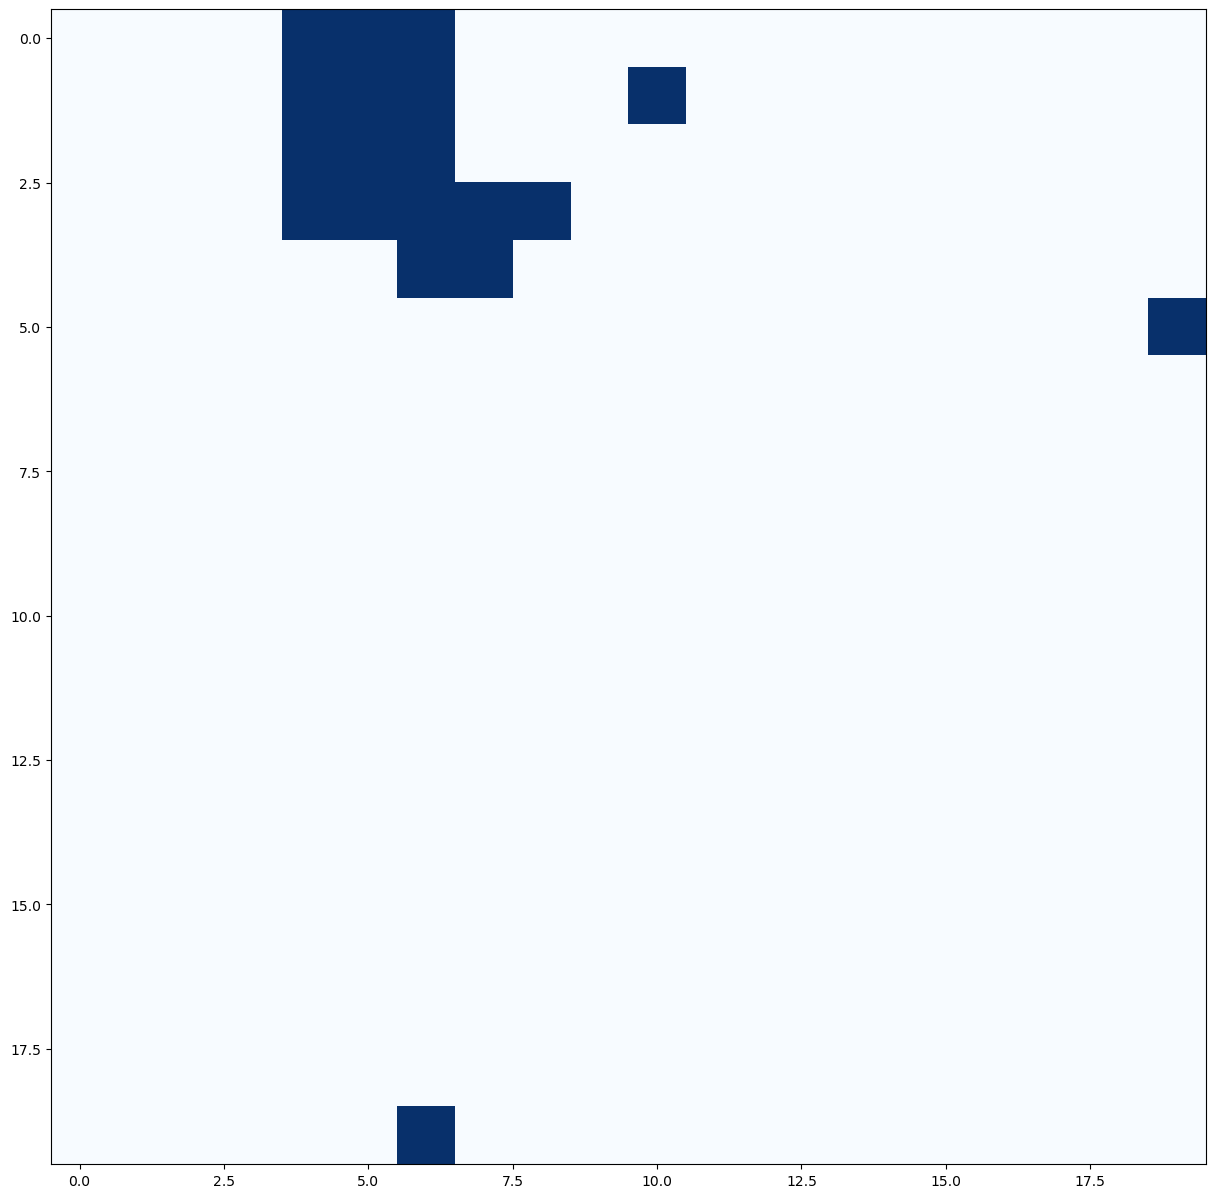

In [7]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(sim1.lattice, cmap='Blues')

with energy and magnetization

In [8]:
sim1.summary()

--- SUMMARY ---
m = -362
E = -752


### Expected values vs temperature

In [9]:
temperatures = [i/10 for i in range(1, 41, 1)]

eq_reps = 2_000
mc_reps = 2_000

In [10]:
plot_energy = np.zeros(len(temperatures))
plot_magnet = np.zeros(len(temperatures))
plot_heat = np.zeros(len(temperatures))
plot_chi = np.zeros(len(temperatures))

for T,i in zip(temperatures,range(len(temperatures))):
    sim1.init_lattice()
    
    for _ in range(eq_reps):
        sim1.montecarlo(20*20, T)
        
    list_energy = np.zeros(mc_reps)
    list_magnet = np.zeros(mc_reps)
    for j in range(mc_reps):
        sim1.montecarlo(20*20, T)
        list_energy[j] = sim1.energy
        list_magnet[j] = sim1.magnet
        
    plot_energy[i] = list_energy.mean()/(sim1.width*sim1.height)
    plot_heat[i] = (list_energy**2).mean()/(sim1.width*sim1.height) - list_energy.mean()**2/(sim1.width*sim1.height)
    plot_magnet[i] = list_magnet.mean()/(sim1.width*sim1.height)
    plot_chi[i] = (list_magnet**2).mean()/(sim1.width*sim1.height) - list_magnet.mean()**2/(sim1.width*sim1.height)

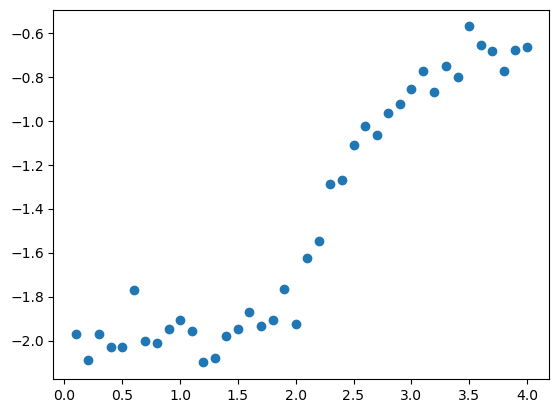

In [11]:
fig, ax = plt.subplots()
ax.scatter(temperatures, plot_energy)

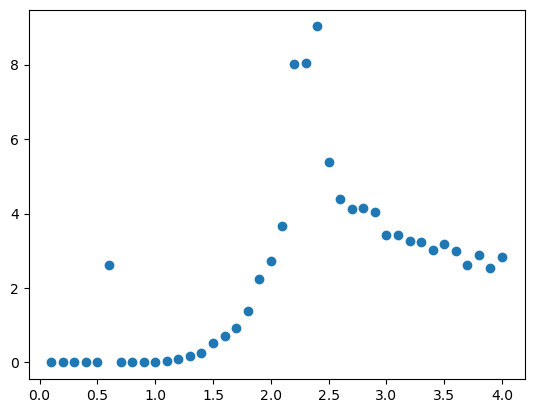

In [12]:
fig, ax = plt.subplots()
ax.scatter(temperatures, plot_heat)

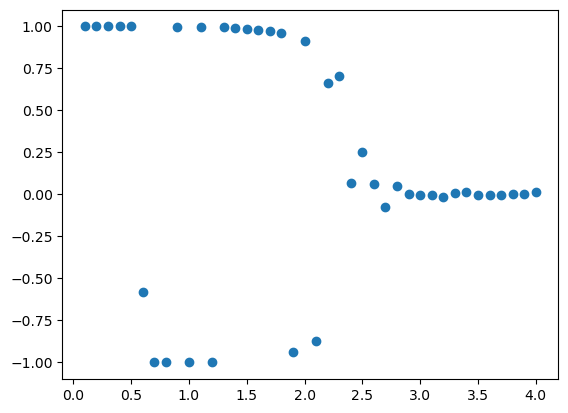

In [13]:
fig, ax = plt.subplots()
ax.scatter(temperatures, plot_magnet)

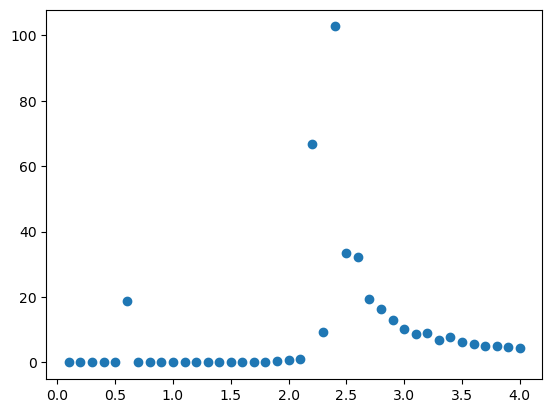

In [14]:
fig, ax = plt.subplots()
ax.scatter(temperatures, plot_chi)